1) Import des utilitaires

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import cv2

import os

import random

from datetime import datetime

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

sns.set_theme (style = "whitegrid", palette= "pastel")

II) Import des données de test et train (texte)

In [1]:
test = pd.read_csv("X_test_update.csv", sep = ',')
train = pd.read_csv("X_train_update.csv", sep = ',')


In [2]:
print (test.head(10))
print (train.head(10))

   Unnamed: 0                                        designation  \
0       84916  Folkmanis Puppets - 2732 - Marionnette Et Théâ...   
1       84917  Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   
2       84918                  Pompe de filtration Speck Badu 95   
3       84919                        Robot de piscine électrique   
4       84920  Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...   
5       84921  Cadre Universal Pro Mont Accessoires Pour Dji ...   
6       84922                   5 Biberons Roses En Pâte À Sucre   
7       84923              Maigrir Rester Jeune N°1 Octobre 1974   
8       84924           Grand Canapé 3 Places Chesterfield Blanc   
9       84925           Piscine Beach Wave 229x229x56 cm 57495NP   

                                         description   productid     imageid  
0                                                NaN   516376098  1019294171  
1                                                NaN   133389013  1274228667  
2             

3) Premier examens des données 

In [3]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13812 entries, 0 to 13811
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   13812 non-null  int64 
 1   designation  13812 non-null  object
 2   description  8926 non-null   object
 3   productid    13812 non-null  int64 
 4   imageid      13812 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 539.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   84916 non-null  int64 
 1   designation  84916 non-null  object
 2   description  55116 non-null  object
 3   productid    84916 non-null  int64 
 4   imageid      84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.2+ MB


In [4]:
print('Dimension de la base test :', test.shape, '\n')

print(test.columns)

print('Dimension de la base train :', train.shape, '\n')

print(train.columns)

Dimension de la base test : (13812, 5) 

Index(['Unnamed: 0', 'designation', 'description', 'productid', 'imageid'], dtype='object')
Dimension de la base train : (84916, 5) 

Index(['Unnamed: 0', 'designation', 'description', 'productid', 'imageid'], dtype='object')


4) Données manquantes et gestions des données manquantes

In [5]:
total_nan = test.isna().sum().sum()
print(total_nan)

4886


In [6]:
total_nan = train.isna().sum().sum()
print(total_nan)

29800


In [7]:
nan_percentage = test.isna().mean() * 100
print(nan_percentage)

Unnamed: 0      0.000000
designation     0.000000
description    35.375036
productid       0.000000
imageid         0.000000
dtype: float64


In [8]:
nan_percentage = train.isna().mean() * 100
print(nan_percentage)

Unnamed: 0      0.000000
designation     0.000000
description    35.093504
productid       0.000000
imageid         0.000000
dtype: float64


In [9]:
test.set_index('Unnamed: 0', inplace=True)

In [10]:
test.head(10)

designation  \
Unnamed: 0                                                      
84916       Folkmanis Puppets - 2732 - Marionnette Et Théâ...   
84917       Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   
84918                       Pompe de filtration Speck Badu 95   
84919                             Robot de piscine électrique   
84920       Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...   
84921       Cadre Universal Pro Mont Accessoires Pour Dji ...   
84922                        5 Biberons Roses En Pâte À Sucre   
84923                   Maigrir Rester Jeune N°1 Octobre 1974   
84924                Grand Canapé 3 Places Chesterfield Blanc   
84925                Piscine Beach Wave 229x229x56 cm 57495NP   

                                                  description   productid  \
Unnamed: 0                                                                  
84916                                                     NaN   516376098   
84917                                                     NaN   133389013   
84918                                                     NaN  4128438366   
84919       <p>Ce robot de piscine d&#39;un design innovan...  3929899732   
84920                                                     NaN   152993898   
84921       Cadre Universal Pro Mont Accessoires Pour DJI ...  4181949876   
84922       Lot de 5 biberons de 3cm de haut en pâte à suc...  3317712987   
84923                                                     NaN  3558757378   
84924       Le véritable canapé Chesterfield 3 places<br /...  4167105045   
84925       <p>Cette piscine gonflable Beach Wave 57495NP ...  3929890142   

               imageid  
Unnamed: 0              
84916       1019294171  
84917       1274228667  
84918       1295960357  
84919       1265224052  
84920        940543690  
84921       1310030687  
84922       1206034470  
84923       1222015991  
84924       1306015443  
84925       1265209967

5) Gestion des données manquantes

In [11]:
test['description'] = test['description'].fillna(test['designation'])

test.head(10)
#on remplace les nan dans la base test de description par une copie du texte de designation

designation  \
Unnamed: 0                                                      
84916       Folkmanis Puppets - 2732 - Marionnette Et Théâ...   
84917       Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   
84918                       Pompe de filtration Speck Badu 95   
84919                             Robot de piscine électrique   
84920       Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...   
84921       Cadre Universal Pro Mont Accessoires Pour Dji ...   
84922                        5 Biberons Roses En Pâte À Sucre   
84923                   Maigrir Rester Jeune N°1 Octobre 1974   
84924                Grand Canapé 3 Places Chesterfield Blanc   
84925                Piscine Beach Wave 229x229x56 cm 57495NP   

                                                  description   productid  \
Unnamed: 0                                                                  
84916       Folkmanis Puppets - 2732 - Marionnette Et Théâ...   516376098   
84917       Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   133389013   
84918                       Pompe de filtration Speck Badu 95  4128438366   
84919       <p>Ce robot de piscine d&#39;un design innovan...  3929899732   
84920       Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...   152993898   
84921       Cadre Universal Pro Mont Accessoires Pour DJI ...  4181949876   
84922       Lot de 5 biberons de 3cm de haut en pâte à suc...  3317712987   
84923                   Maigrir Rester Jeune N°1 Octobre 1974  3558757378   
84924       Le véritable canapé Chesterfield 3 places<br /...  4167105045   
84925       <p>Cette piscine gonflable Beach Wave 57495NP ...  3929890142   

               imageid  
Unnamed: 0              
84916       1019294171  
84917       1274228667  
84918       1295960357  
84919       1265224052  
84920        940543690  
84921       1310030687  
84922       1206034470  
84923       1222015991  
84924       1306015443  
84925       1265209967

In [12]:
train['description'] = train['description'].fillna(train['designation'])

train.head(10)
#on remplace les nan de la base train dans description par une copie du texte de designation

Unnamed: 0                                        designation  \
0           0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1           1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2           2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3           3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4           4                               La Guerre Des Tuques   
5           5  Afrique Contemporaine N° 212 Hiver 2004 - Doss...   
6           6         Christof E: Bildungsprozessen Auf Der Spur   
7           7  Conquérant Sept Cahier Couverture Polypro 240 ...   
8           8          Puzzle Scooby-Doo Avec Poster 2x35 Pieces   
9           9  Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...   

                                         description   productid     imageid  
0  Olivia: Personalisiertes Notizbuch / 150 Seite...  3804725264  1263597046  
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   436067568  1008141237  
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978  
3  Peluche Donald - Europe - Disneyland 2000 (Mar...    50418756   457047496  
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786  
5  Afrique Contemporaine N° 212 Hiver 2004 - Doss...     5862738   393356830  
6         Christof E: Bildungsprozessen Auf Der Spur    91920807   907794536  
7  CONQUERANT CLASSIQUE Cahier 240 x 320 mm seyès...   344240059   999581347  
8          Puzzle Scooby-Doo Avec Poster 2x35 Pieces  4239126071  1325918866  
9  Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m5...  3793572222  1245644185

In [13]:
total_nan = test.isna().sum().sum()
print(total_nan)

0


In [14]:
total_nan = train.isna().sum().sum()
print(total_nan)

0


5-2) Gestion de texte doublon (dans la base test)

In [15]:
test.columns = test.columns.str.strip()  # Supprime les espaces en début/fin

In [16]:
print(test.head())


                                                  designation  \
Unnamed: 0                                                      
84916       Folkmanis Puppets - 2732 - Marionnette Et Théâ...   
84917       Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   
84918                       Pompe de filtration Speck Badu 95   
84919                             Robot de piscine électrique   
84920       Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...   

                                                  description   productid  \
Unnamed: 0                                                                  
84916       Folkmanis Puppets - 2732 - Marionnette Et Théâ...   516376098   
84917       Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   133389013   
84918                       Pompe de filtration Speck Badu 95  4128438366   
84919       <p>Ce robot de piscine d&#39;un design innovan...  3929899732   
84920       Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...   152993898   

    

In [17]:
from rapidfuzz import fuzz
def find_similar_texts_with_ids(df, id_column, text_column, similarity_threshold=85):
    """
    Trouve les textes similaires dans une colonne d'un DataFrame, avec les IDs des textes.
    
    Args:
        df (pd.DataFrame): Le DataFrame contenant les données textuelles.
        id_column (str): Le nom de la colonne contenant les IDs des textes.
        text_column (str): Le nom de la colonne contenant les textes à comparer.
        similarity_threshold (int): Le seuil de similarité (0-100).
        
    Returns:
        pd.DataFrame: Un DataFrame contenant les paires de textes similaires avec leurs IDs.
    """
    if text_column not in df.columns:
        raise ValueError(f"La colonne '{text_column}' n'existe pas dans le DataFrame.")
    if id_column not in df.columns:
        raise ValueError(f"La colonne '{id_column}' n'existe pas dans le DataFrame.")
    
    # Obtenir les textes uniques avec leurs IDs
    texts = df[[id_column, text_column]].dropna().values
    
    similar_pairs = []
    
    # Comparer chaque texte avec les autres
    for i, (id1, text1) in enumerate(texts):
        for j, (id2, text2) in enumerate(texts):
            if i >= j:  # Éviter les répétitions et auto-comparaisons
                continue
            similarity = fuzz.ratio(text1, text2)
            if similarity >= similarity_threshold:
                similar_pairs.append({
                    "ID Texte 1": id1,
                    "Texte 1": text1,
                    "ID Texte 2": id2,
                    "Texte 2": text2,
                    "Similarité (%)": similarity
                })
    
    # Convertir les résultats en DataFrame
    return pd.DataFrame(similar_pairs)

# Trouver les textes similaires
similar_texts_df = find_similar_texts_with_ids(
    test, 
    id_column="productid", 
    text_column="designation", 
    similarity_threshold=85
)

# Afficher les résultats
print(similar_texts_df)



      ID Texte 1                                            Texte 1  \
0     4128438366                  Pompe de filtration Speck Badu 95   
1     4128438366                  Pompe de filtration Speck Badu 95   
2     3929899732                        Robot de piscine électrique   
3     4164659623  Carnet De Notes Bloc-Notes Cahier Monument Hu ...   
4     4164659623  Carnet De Notes Bloc-Notes Cahier Monument Hu ...   
...          ...                                                ...   
2334  4077154716  5d Broderie Peintures Strass Diamant Bricolage...   
2335  3857173183  Pompe filtrante de piscine Intex Bestway 185 W...   
2336  3898721413  Nouveau-né bébé Cartoon bébé nouveau-né Filles...   
2337  3929890019           Couverture de piscine ronde 305 cm 28021   
2338    53571464                 Eurostar 2 - Pompe  - 14cv -  mono   

      ID Texte 2                                            Texte 2  \
0     4128438370                  Pompe de filtration Speck Badu 95   
1    

In [18]:
from rapidfuzz import process, fuzz

def remove_exact_duplicates(df, id_column, text_column):
    """
    Supprime les doublons avec une similarité de 100 % dans un DataFrame.
    
    Args:
        df (pd.DataFrame): Le DataFrame contenant les données.
        id_column (str): Le nom de la colonne contenant les IDs.
        text_column (str): Le nom de la colonne contenant les textes.
    
    Returns:
        pd.DataFrame: Un DataFrame sans les doublons exacts.
    """
    # Créez une colonne des textes uniques pour détecter les doublons à 100 %
    unique_texts = {}
    rows_to_keep = []
    
    for index, row in df.iterrows():
        text = row[text_column]
        if text not in unique_texts:
            unique_texts[text] = row[id_column]  # Enregistrer le premier ID pour chaque texte unique
            rows_to_keep.append(index)
    
    # Filtrer uniquement les lignes uniques
    return df.loc[rows_to_keep].reset_index(drop=True)

# Supprimer les doublons exacts
df_without_duplicates = remove_exact_duplicates (test, id_column="productid", text_column="designation")

# Afficher le DataFrame sans doublons
print(df_without_duplicates)


                                             designation  \
0      Folkmanis Puppets - 2732 - Marionnette Et Théâ...   
1      Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   
2                      Pompe de filtration Speck Badu 95   
3                            Robot de piscine électrique   
4      Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...   
...                                                  ...   
13676  Robe De Soutien De Sac De Soins De Les Suspend...   
13677          Livre De Phrases - Français ? Thaïlandais   
13678               Tifon1 200 M de Espa - Pompe piscine   
13679  Christmas Home Non Slip Door Floor Mats Hall R...   
13680  Suspension Cascade 6 Lumières Verra Noire Et C...   

                                             description   productid  \
0      Folkmanis Puppets - 2732 - Marionnette Et Théâ...   516376098   
1      Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   133389013   
2                      Pompe de filtration Speck Badu 95  41284

In [20]:
from rapidfuzz import fuzz
def find_similar_texts_with_ids(df, id_column, text_column, similarity_threshold=95):
    """
    Trouve les textes similaires dans une colonne d'un DataFrame, avec les IDs des textes.
    
    Args:
        df (pd.DataFrame): Le DataFrame contenant les données textuelles.
        id_column (str): Le nom de la colonne contenant les IDs des textes.
        text_column (str): Le nom de la colonne contenant les textes à comparer.
        similarity_threshold (int): Le seuil de similarité (0-100).
        
    Returns:
        pd.DataFrame: Un DataFrame contenant les paires de textes similaires avec leurs IDs.
    """
    if text_column not in df.columns:
        raise ValueError(f"La colonne '{text_column}' n'existe pas dans le DataFrame.")
    if id_column not in df.columns:
        raise ValueError(f"La colonne '{id_column}' n'existe pas dans le DataFrame.")
    
    # Obtenir les textes uniques avec leurs IDs
    texts = df[[id_column, text_column]].dropna().values
    
    similar_pairs = []
    
    # Comparer chaque texte avec les autres
    for i, (id1, text1) in enumerate(texts):
        for j, (id2, text2) in enumerate(texts):
            if i >= j:  # Éviter les répétitions et auto-comparaisons
                continue
            similarity = fuzz.ratio(text1, text2)
            if similarity >= similarity_threshold:
                similar_pairs.append({
                    "ID Texte 1": id1,
                    "Texte 1": text1,
                    "ID Texte 2": id2,
                    "Texte 2": text2,
                    "Similarité (%)": similarity
                })
    
    # Convertir les résultats en DataFrame
    return pd.DataFrame(similar_pairs)

# Trouver les textes similaires
similar_texts_df = find_similar_texts_with_ids(
    df_without_duplicates, 
    id_column="productid", 
    text_column="designation", 
    similarity_threshold=95
)

# Afficher les résultats
print(similar_texts_df)



     ID Texte 1                                            Texte 1  \
0    3785187845  Kit piscine acier aspect pierre Gré Córcega ov...   
1    4234090861  Silicone Housse De Protection Pour Poké Ball P...   
2    4086141537  5d Broderie Peintures Strass Diamant Bricolage...   
3    4086141537  5d Broderie Peintures Strass Diamant Bricolage...   
4    4086141537  5d Broderie Peintures Strass Diamant Bricolage...   
..          ...                                                ...   
310  4071748475  TECTAKE Bâche à bulles pour Piscine ronde de p...   
311   122458822  Linxor - Bâche à Bulle 300 microns Piscine 6m ...   
312  4077202438  5d Broderie Peintures Strass Diamant Bricolage...   
313  4061585509  Christmas Home Non Slip Door Floor Mats Hall R...   
314    53571464                 Eurostar 2 - Pompe  - 14cv -  mono   

     ID Texte 2                                            Texte 2  \
0    3785187853  Kit piscine acier aspect pierre Gré Córcega ov...   
1    3814580412  Si

6) Gestion des images (Test)

6-1) Creation du Df d'image (redimensionné)

In [52]:
image_size = (350,350)

def load_and_resize_image (image_path, size = image_size):
    img = cv2.imread (image_path)
    if img is not None :
        original_shape = img.shape
        height, width = original_shape [:2]
        weight = img.size
        img = cv2.resize (img, size)
        return img.flatten (), original_shape, height, width, weight
    else:
        print ("erreur lors du chargement de l'image:{image_path}")
        return None, None,None,None,None

desktop_path = os.path.expanduser ("~/Desktop/datas")
print ("chemin vers dossier_test:", desktop_path)

if not os.path.exists (desktop_path):
    raise FileNotFoundError (f"Le dossier spécifié n'existe pas: {desktop_path}")

images_classes = os.listdir (desktop_path)

data = []

for label in images_classes:
    folder_path = os.path.join (desktop_path, label)
    if os.path.isdir(folder_path):
        for img_file in os.listdir (folder_path):
            if img_file.endswith(('.png', ".jpg", ".jpeg", ".tiff")):
                file_type = os.path.splitext (img_file) [1]
                img_path = os.path.join (folder_path, img_file)
                pixels, original_shape, height, width, weight = load_and_resize_image (img_path, size=(64,64))
                if pixels is not None:
                    data.append ({
                        "image_path" :img_path,
                        "label": label,
                        "image_pixels": pixels,
                        "original_shape":  original_shape,
                        "height": height,
                        "width": width,
                        "weight": weight,
                        "file_type": file_type
                    })


df = pd.DataFrame(data)
df.head()


chemin vers dossier_test: C:\Users\dunca/Desktop/datas


image_path       label  \
0  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
1  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
2  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
3  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
4  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   

                                        image_pixels original_shape  height  \
0  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...  (500, 500, 3)     500   
1  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...  (500, 500, 3)     500   
2  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...  (500, 500, 3)     500   
3  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...  (500, 500, 3)     500   
4  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...  (500, 500, 3)     500   

   width  weight file_type  
0    500  750000      .jpg  
1    500  750000      .jpg  
2    500  750000      .jpg  
3    500  750000      .jpg  
4    500  750000      .jpg

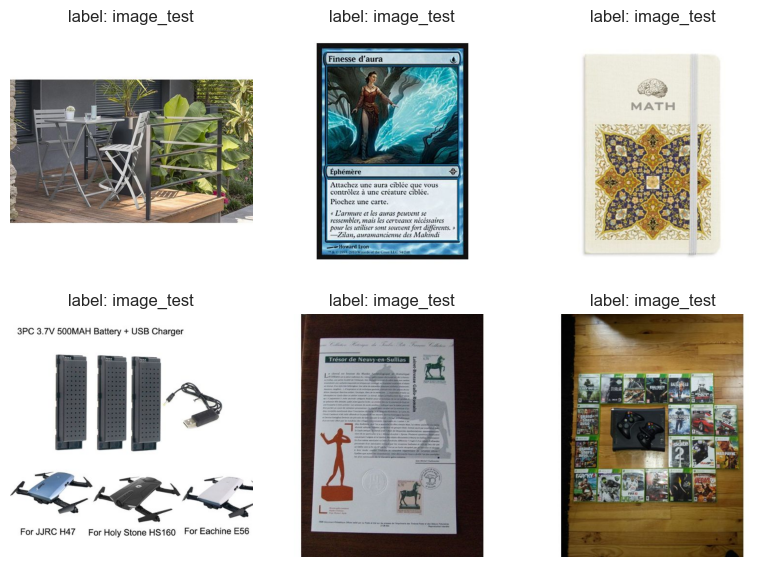

In [47]:
num_image = 6

random_images = df.sample (n = num_image)

fig, axes = plt.subplots (2,3 , figsize = (8,6))
axes = axes.ravel()

for i, (_,row) in enumerate (random_images.iterrows()):
    image_path = row["image_path"]
    image = cv2.imread (image_path)
    image_rgb = cv2.cvtColor (image, cv2.COLOR_BGR2RGB)

    axes[i].imshow(image_rgb)
    axes[i].axis("off")
    axes[i].set_title (f"label: {row["label"]}")

plt.tight_layout()
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13812 entries, 0 to 13811
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_path      13812 non-null  object
 1   label           13812 non-null  object
 2   image_pixels    13812 non-null  object
 3   original_shape  13812 non-null  object
 4   height          13812 non-null  int64 
 5   width           13812 non-null  int64 
 6   weight          13812 non-null  int64 
 7   file_type       13812 non-null  object
dtypes: int64(3), object(5)
memory usage: 863.4+ KB


In [18]:
print('Dimension du dataframe :', df.shape, '\n')

print(df.columns)

Dimension du dataframe : (13812, 8) 

Index(['image_path', 'label', 'image_pixels', 'original_shape', 'height',
       'width', 'weight', 'file_type'],
      dtype='object')


In [19]:
total_nan = df.isna().sum().sum()
print(total_nan)

0


In [20]:
df.describe()

height    width    weight
count  13812.0  13812.0   13812.0
mean     500.0    500.0  750000.0
std        0.0      0.0       0.0
min      500.0    500.0  750000.0
25%      500.0    500.0  750000.0
50%      500.0    500.0  750000.0
75%      500.0    500.0  750000.0
max      500.0    500.0  750000.0

In [21]:
df.sort_values(by=["width", "height"], ascending=False, inplace=True)
print(df.head())


                                          image_path       label  \
0  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
1  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
2  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
3  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
4  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   

                                        image_pixels original_shape  height  \
0  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...  (500, 500, 3)     500   
1  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...  (500, 500, 3)     500   
2  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...  (500, 500, 3)     500   
3  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...  (500, 500, 3)     500   
4  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...  (500, 500, 3)     500   

   width  weight file_type  
0    500  750000      .jpg  
1    500  750000      .jpg  
2    500  750000      .jpg  


In [53]:
mean_width = df["width"].mean()
mean_height = df["height"].mean()
print(f"Dimensions moyennes des images : {mean_width}x{mean_height}")


Dimensions moyennes des images : 500.0x500.0


In [23]:
anomalies = df[(df["width"] > mean_width * 2) | (df["height"] > mean_height * 2)]
print("Images avec des dimensions anormalement grandes :", anomalies)


Images avec des dimensions anormalement grandes : Empty DataFrame
Columns: [image_path, label, image_pixels, original_shape, height, width, weight, file_type]
Index: []


7) Gestion des images doublon

In [64]:
import os
from PIL import Image
import imagehash
import pandas as pd

# Chemin vers le dossier racine contenant les catégories
desktop_path = os.path.expanduser ("~/Desktop/datas")

# Liste pour stocker les informations sur les images
image_data = []

# Parcourir les catégories (sous-dossiers)
for category in os.listdir(desktop_path):
    category_path = os.path.join(desktop_path, category)
    
    if os.path.isdir(category_path):  # Vérifie si c'est un dossier
        for file in os.listdir(category_path):
            if file.endswith((".jpg", ".png", ".jpeg")):  # Filtrer les fichiers image
                file_path = os.path.join(category_path, file)
                try:
                    # Charger l'image
                    img = Image.open(file_path)
                    
                    # Calculer un hachage perceptuel pour l'image
                    hash_val = imagehash.average_hash(img)
                    
                    # Ajouter les informations au DataFrame
                    image_data.append({
                        "category": category,
                        "filename": file,
                        "hash": str(hash_val),
                        "path": file_path
                    })
                except Exception as e:
                    print(f"Erreur lors du traitement de {file}: {e}")

# Créer un DataFrame à partir des données collectées
df_images = pd.DataFrame(image_data)


In [65]:
# Grouper par catégorie et repérer les doublons en fonction du hachage
duplicates = df_images[df_images.duplicated(subset=["category", "hash"], keep=False)]

print("Doublons détectés :")
print(duplicates)


Doublons détectés :
         category                                filename              hash  \
4      image_test  image_1000524141_product_357695994.jpg  ffffe7c3c3e7ffff   
7      image_test  image_1001647622_product_371862671.jpg  ffff83838181ffff   
11     image_test  image_1002267962_product_376372516.jpg  ffffc3818183ffff   
13     image_test  image_1002497647_product_373336276.jpg  ff000000000000ff   
14     image_test  image_1002633524_product_383177798.jpg  ffffc38181c3ffff   
...           ...                                     ...               ...   
13795  image_test   image_998334794_product_334560449.jpg  e7c3c3c3c3c3c3ff   
13797  image_test    image_998404639_product_67335333.jpg  ffffe7e7e7e7ffff   
13802  image_test   image_998491349_product_334574928.jpg  ffe7c3c3c3c3c3e7   
13805  image_test    image_998788117_product_86426708.jpg  ffffe7c3c3e7ffff   
13809  image_test   image_999797207_product_347348755.jpg  ffffe3c3c3e7ffff   

                               

In [68]:
# Identifier les doublons par catégorie et hash
duplicate_groups = duplicates.groupby(['category', 'hash']).filter(lambda x: len(x) > 1)

# Associer chaque fichier avec son doublon
pairs = duplicate_groups.groupby(['category', 'hash']).apply(
    lambda x: pd.DataFrame({
        "path_1": x['path'].iloc[:-1].values,
        "path_2": x['path'].iloc[1:].values,
    })
).reset_index(drop=True)

print(pairs.head())  # Vérification


                                              path_1  \
0  C:\Users\dunca/Desktop/datas\image_test\image_...   
1  C:\Users\dunca/Desktop/datas\image_test\image_...   
2  C:\Users\dunca/Desktop/datas\image_test\image_...   
3  C:\Users\dunca/Desktop/datas\image_test\image_...   
4  C:\Users\dunca/Desktop/datas\image_test\image_...   

                                              path_2  
0  C:\Users\dunca/Desktop/datas\image_test\image_...  
1  C:\Users\dunca/Desktop/datas\image_test\image_...  
2  C:\Users\dunca/Desktop/datas\image_test\image_...  
3  C:\Users\dunca/Desktop/datas\image_test\image_...  
4  C:\Users\dunca/Desktop/datas\image_test\image_...  


C:\Users\dunca\AppData\Local\Temp\ipykernel_40988\2946617797.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairs = duplicate_groups.groupby(['category', 'hash']).apply(


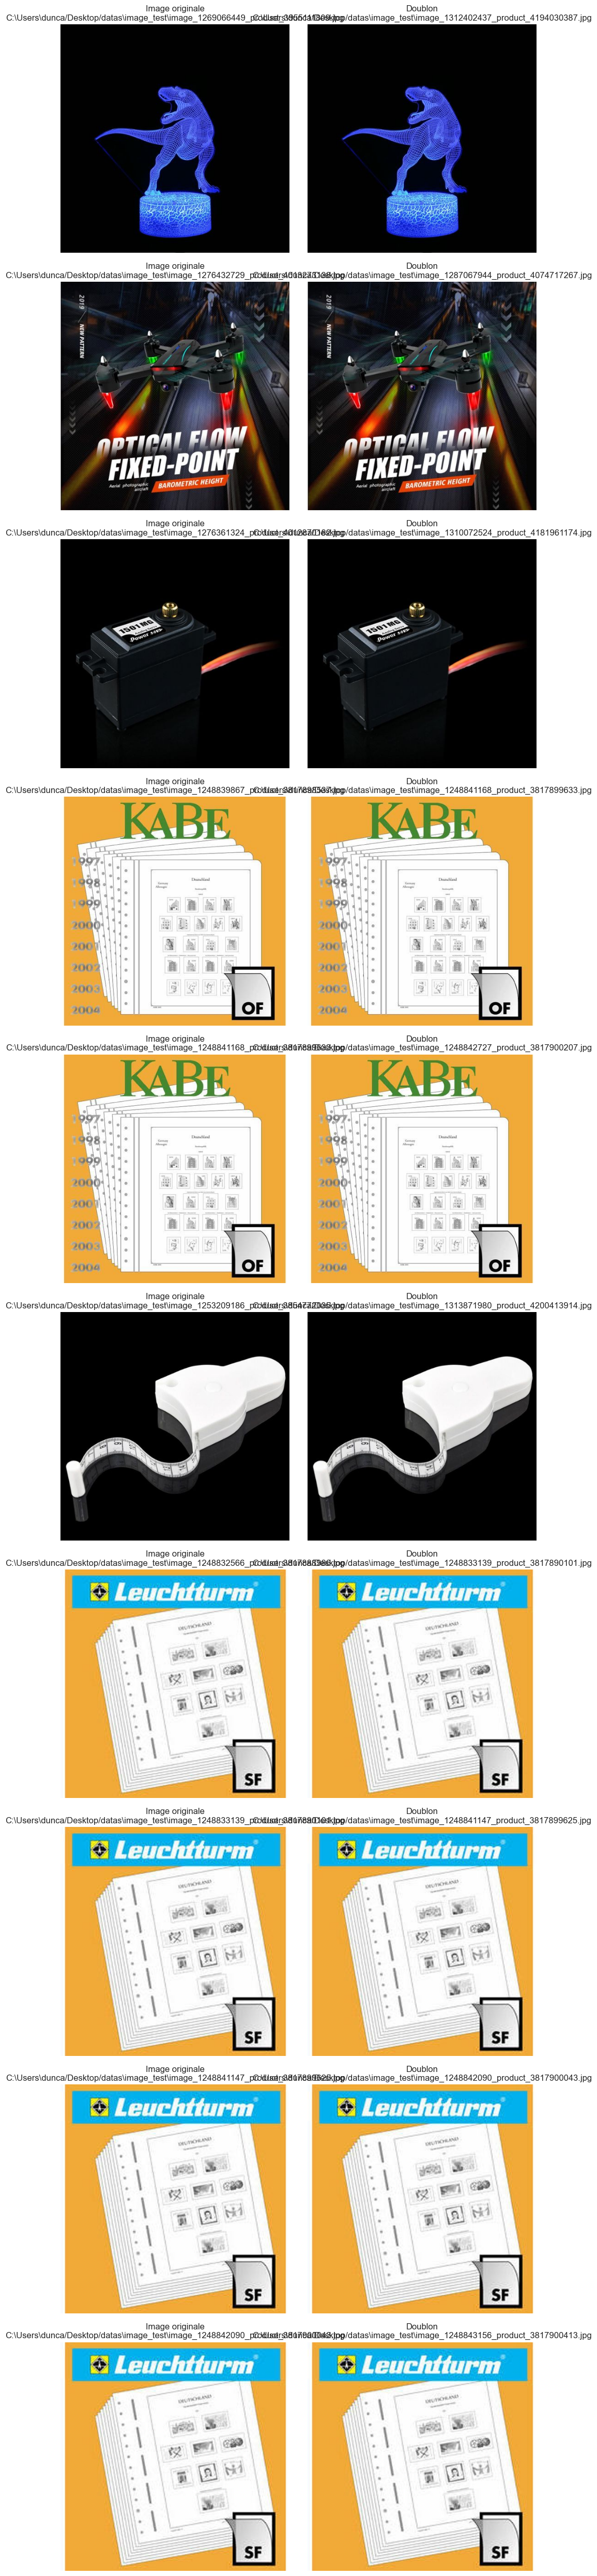

In [69]:
import matplotlib.pyplot as plt
from PIL import Image

# Sélectionner les 10 premières paires de doublons
sample_pairs = pairs.head(10)

# Créer une figure pour afficher les paires
fig, axes = plt.subplots(len(sample_pairs), 2, figsize=(10, len(sample_pairs) * 5))

# Parcourir les paires et afficher les images
for idx, (ax1, ax2) in enumerate(axes):
    row = sample_pairs.iloc[idx]
    try:
        # Charger les deux images
        img1 = Image.open(row["path_1"])
        img2 = Image.open(row["path_2"])
        
        # Afficher la première image
        ax1.imshow(img1)
        ax1.set_title(f"Image originale\n{row['path_1']}")
        ax1.axis("off")
        
        # Afficher la deuxième image
        ax2.imshow(img2)
        ax2.set_title(f"Doublon\n{row['path_2']}")
        ax2.axis("off")
    except Exception as e:
        print(f"Erreur lors de l'affichage pour l'index {idx}: {e}")
        ax1.axis("off")
        ax2.axis("off")

plt.tight_layout()
plt.show()


In [60]:
# Sélectionner 5 paires aléatoires
random_pairs = pairs.sample(5, random_state=42).reset_index(drop=True)


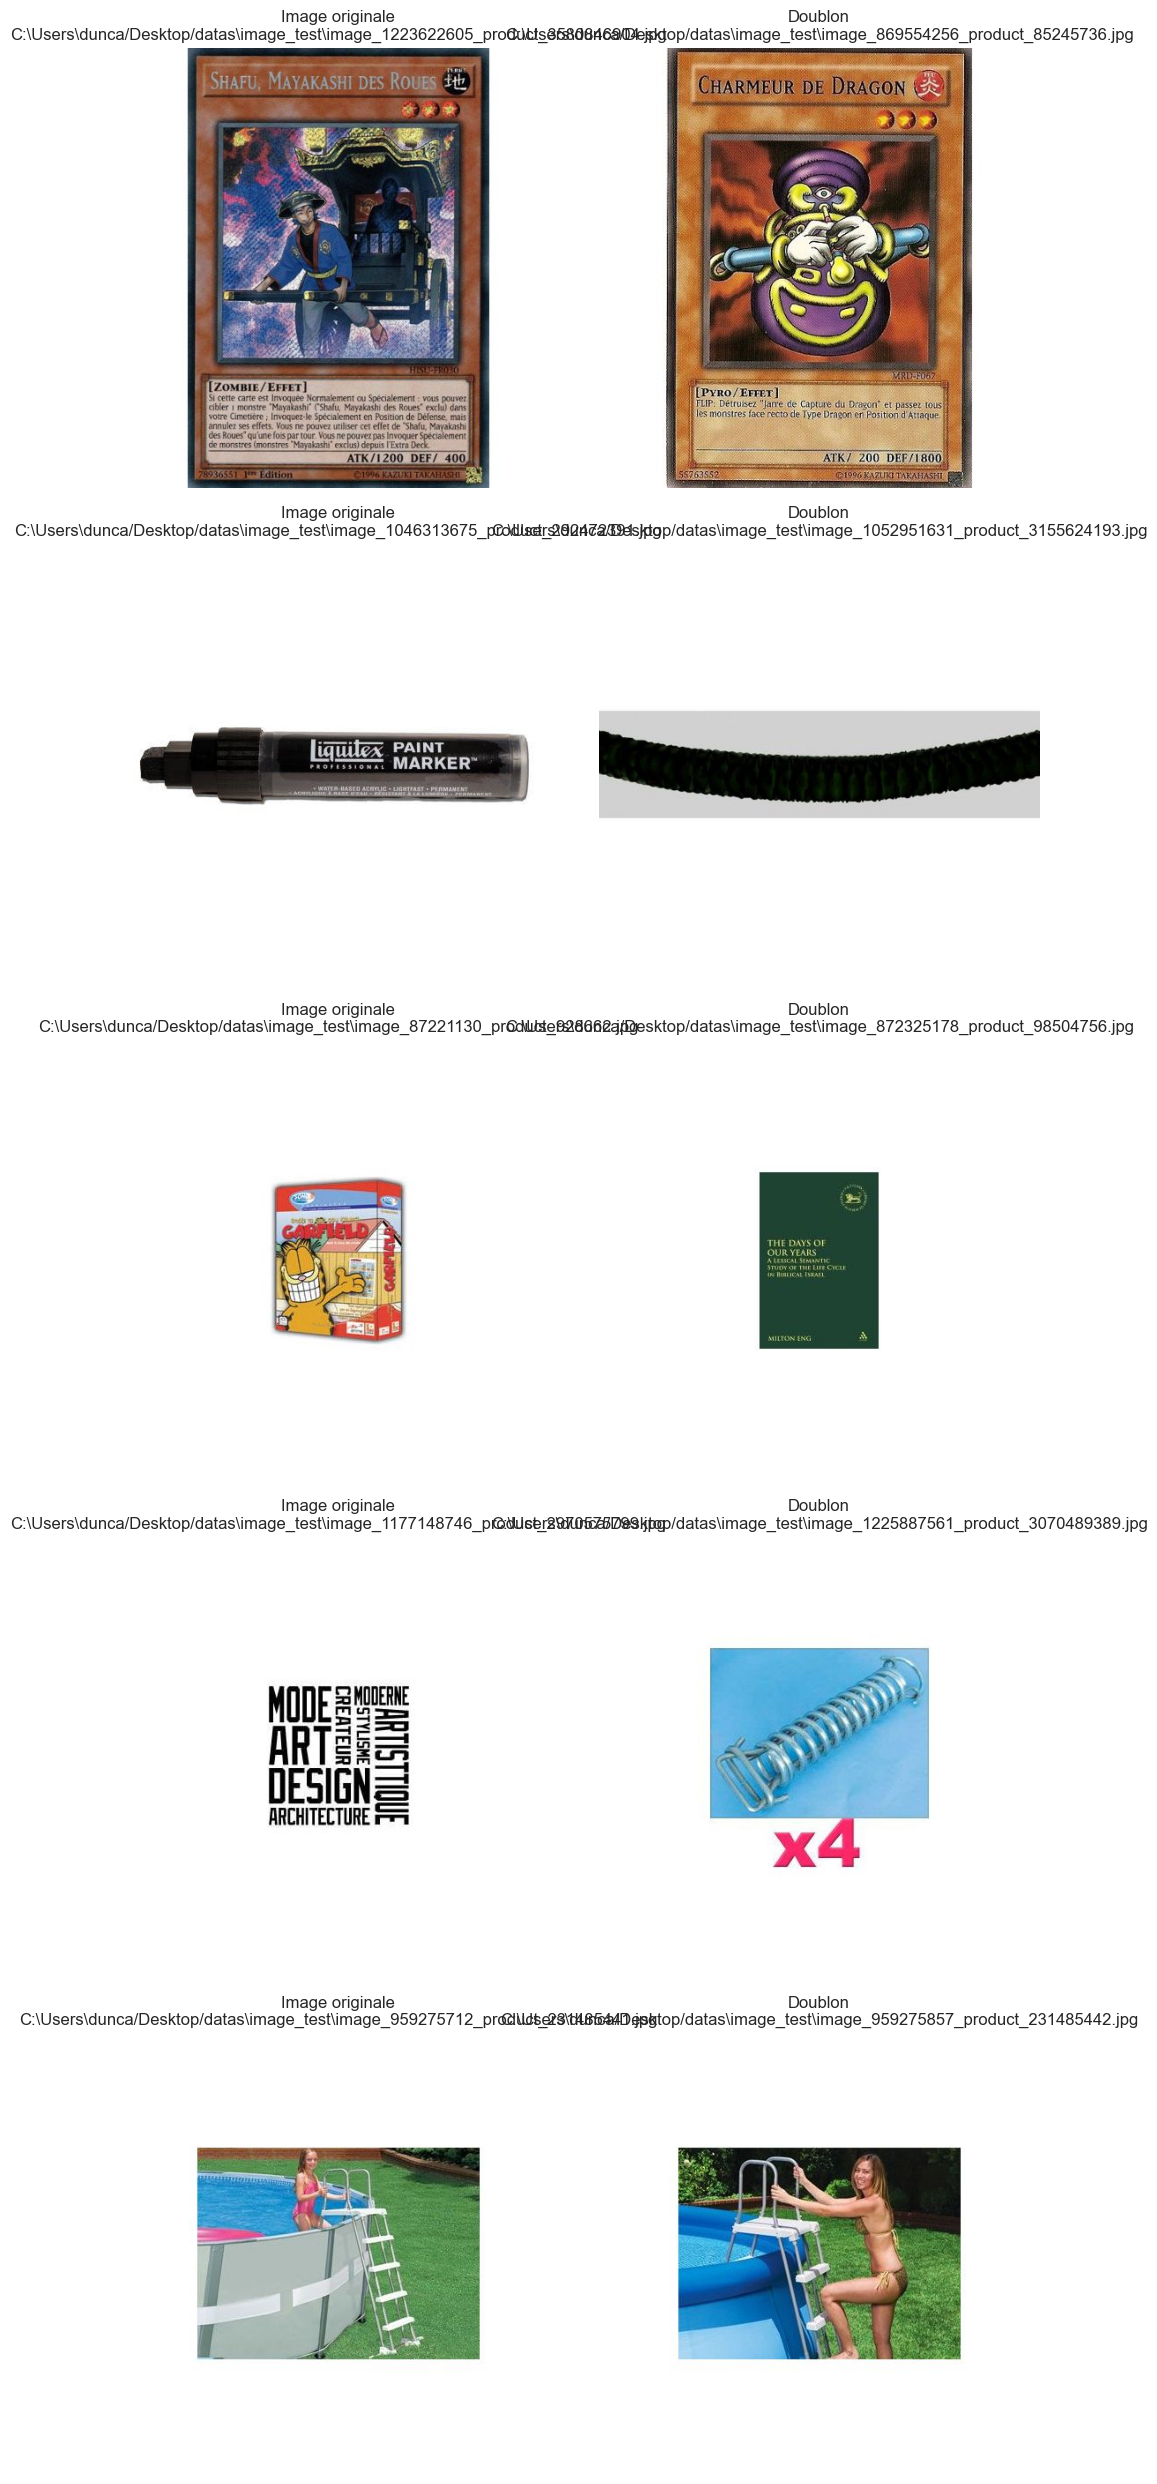

In [61]:
import matplotlib.pyplot as plt
from PIL import Image

# Créer une figure pour afficher les 5 paires
fig, axes = plt.subplots(len(random_pairs), 2, figsize=(10, len(random_pairs) * 5))

# Parcourir les paires et afficher les images
for idx, (ax1, ax2) in enumerate(axes):
    row = random_pairs.iloc[idx]
    try:
        # Charger les deux images
        img1 = Image.open(row["path_1"])
        img2 = Image.open(row["path_2"])
        
        # Afficher la première image
        ax1.imshow(img1)
        ax1.set_title(f"Image originale\n{row['path_1']}")
        ax1.axis("off")
        
        # Afficher la deuxième image
        ax2.imshow(img2)
        ax2.set_title(f"Doublon\n{row['path_2']}")
        ax2.axis("off")
    except Exception as e:
        print(f"Erreur lors de l'affichage pour l'index {idx}: {e}")
        ax1.axis("off")
        ax2.axis("off")

plt.tight_layout()
plt.show()


In [51]:
import os
import cv2
import numpy as np
import pandas as pd

def load_and_crop_image(image_path):
    """Charge une image, détecte les bordures blanches et la recadre."""
    img = cv2.imread(image_path)
    if img is not None:
        # Convertir en niveaux de gris pour simplifier la détection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Détecter les zones non blanches
        _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)  # Seuil pour considérer "non blanc"
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            # Trouver le plus grand rectangle englobant
            x, y, w, h = cv2.boundingRect(np.vstack(contours))
            cropped_img = img[y:y+h, x:x+w]  # Recadrer l'image
            original_shape = img.shape
            cropped_shape = cropped_img.shape
            return cropped_img, original_shape, cropped_shape, x, y, w, h
        else:
            print(f"Aucune zone utile détectée dans l'image : {image_path}")
            return img, img.shape, img.shape, 0, 0, img.shape[1], img.shape[0]
    else:
        print(f"Erreur lors du chargement de l'image : {image_path}")
        return None, None, None, None, None, None, None

# Chemin vers le dossier contenant les images
desktop_path = os.path.expanduser("~/Desktop/datas")
print("Chemin vers dossier_test :", desktop_path)

if not os.path.exists(desktop_path):
    raise FileNotFoundError(f"Le dossier spécifié n'existe pas : {desktop_path}")

images_classes = os.listdir(desktop_path)

data = []

for label in images_classes:
    folder_path = os.path.join(desktop_path, label)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.endswith(('.png', '.jpg', '.jpeg', '.tiff')):
                file_type = os.path.splitext(img_file)[1]
                img_path = os.path.join(folder_path, img_file)
                cropped_img, original_shape, cropped_shape, x, y, w, h = load_and_crop_image(img_path)
                if cropped_img is not None:
                    data.append({
                        "image_path": img_path,
                        "label": label,
                        "original_shape": original_shape,
                        "cropped_shape": cropped_shape,
                        "crop_x": x,
                        "crop_y": y,
                        "crop_width": w,
                        "crop_height": h,
                        "file_type": file_type
                    })

# Création du DataFrame
df_crop = pd.DataFrame(data)
print("Aperçu des données :")
print(df_crop.head())


Chemin vers dossier_test : C:\Users\dunca/Desktop/datas
Aucune zone utile détectée dans l'image : C:\Users\dunca/Desktop/datas\image_test\image_957652503_product_224822209.jpg
Aperçu des données :
                                          image_path       label  \
0  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
1  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
2  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
3  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
4  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   

  original_shape  cropped_shape  crop_x  crop_y  crop_width  crop_height  \
0  (500, 500, 3)  (500, 362, 3)      69       0         362          500   
1  (500, 500, 3)  (145, 287, 3)     106     189         287          145   
2  (500, 500, 3)  (500, 349, 3)      75       0         349          500   
3  (500, 500, 3)  (375, 500, 3)       0      62         500          375   
4  (500, 500, 

In [54]:
df_crop.describe()

crop_x        crop_y    crop_width   crop_height
count  13812.000000  13812.000000  13812.000000  13812.000000
mean      58.850710     57.321749    382.312699    388.703157
std       56.505219     56.124211    112.382383    108.934871
min        0.000000      0.000000     16.000000     14.000000
25%        1.000000      0.000000    301.000000    311.000000
50%       53.000000     49.000000    396.000000    407.000000
75%       99.000000     99.000000    493.000000    498.000000
max      243.000000    287.000000    500.000000    500.000000

In [59]:
mean_width = df_crop["crop_width"].mean()
mean_height = df_crop["crop_height"].mean()
print(f"Dimensions moyennes des images : {mean_width}x{mean_height}")

Dimensions moyennes des images : 382.31269910222994x388.70315667535476


In [57]:
df_crop.sort_values(by=["crop_width", "crop_height"], ascending=False, inplace=True)
print(df_crop.head())

                                            image_path       label  \
83   C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
297  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
326  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
829  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   
971  C:\Users\dunca/Desktop/datas\image_test\image_...  image_test   

    original_shape  cropped_shape  crop_x  crop_y  crop_width  crop_height  \
83   (500, 500, 3)  (500, 500, 3)       0       0         500          500   
297  (500, 500, 3)  (500, 500, 3)       0       0         500          500   
326  (500, 500, 3)  (500, 500, 3)       0       0         500          500   
829  (500, 500, 3)  (500, 500, 3)       0       0         500          500   
971  (500, 500, 3)  (500, 500, 3)       0       0         500          500   

    file_type  
83       .jpg  
297      .jpg  
326      .jpg  
829      .jpg  
971      .jpg  


In [58]:
anomalies_crop = df_crop[(df_crop["crop_width"] > mean_width * 2) | (df_crop["crop_height"] > mean_height * 2)]
print("Images avec des dimensions anormalement grandes :", anomalies)

Images avec des dimensions anormalement grandes : Empty DataFrame
Columns: [image_path, label, image_pixels, original_shape, height, width, weight, file_type]
Index: []


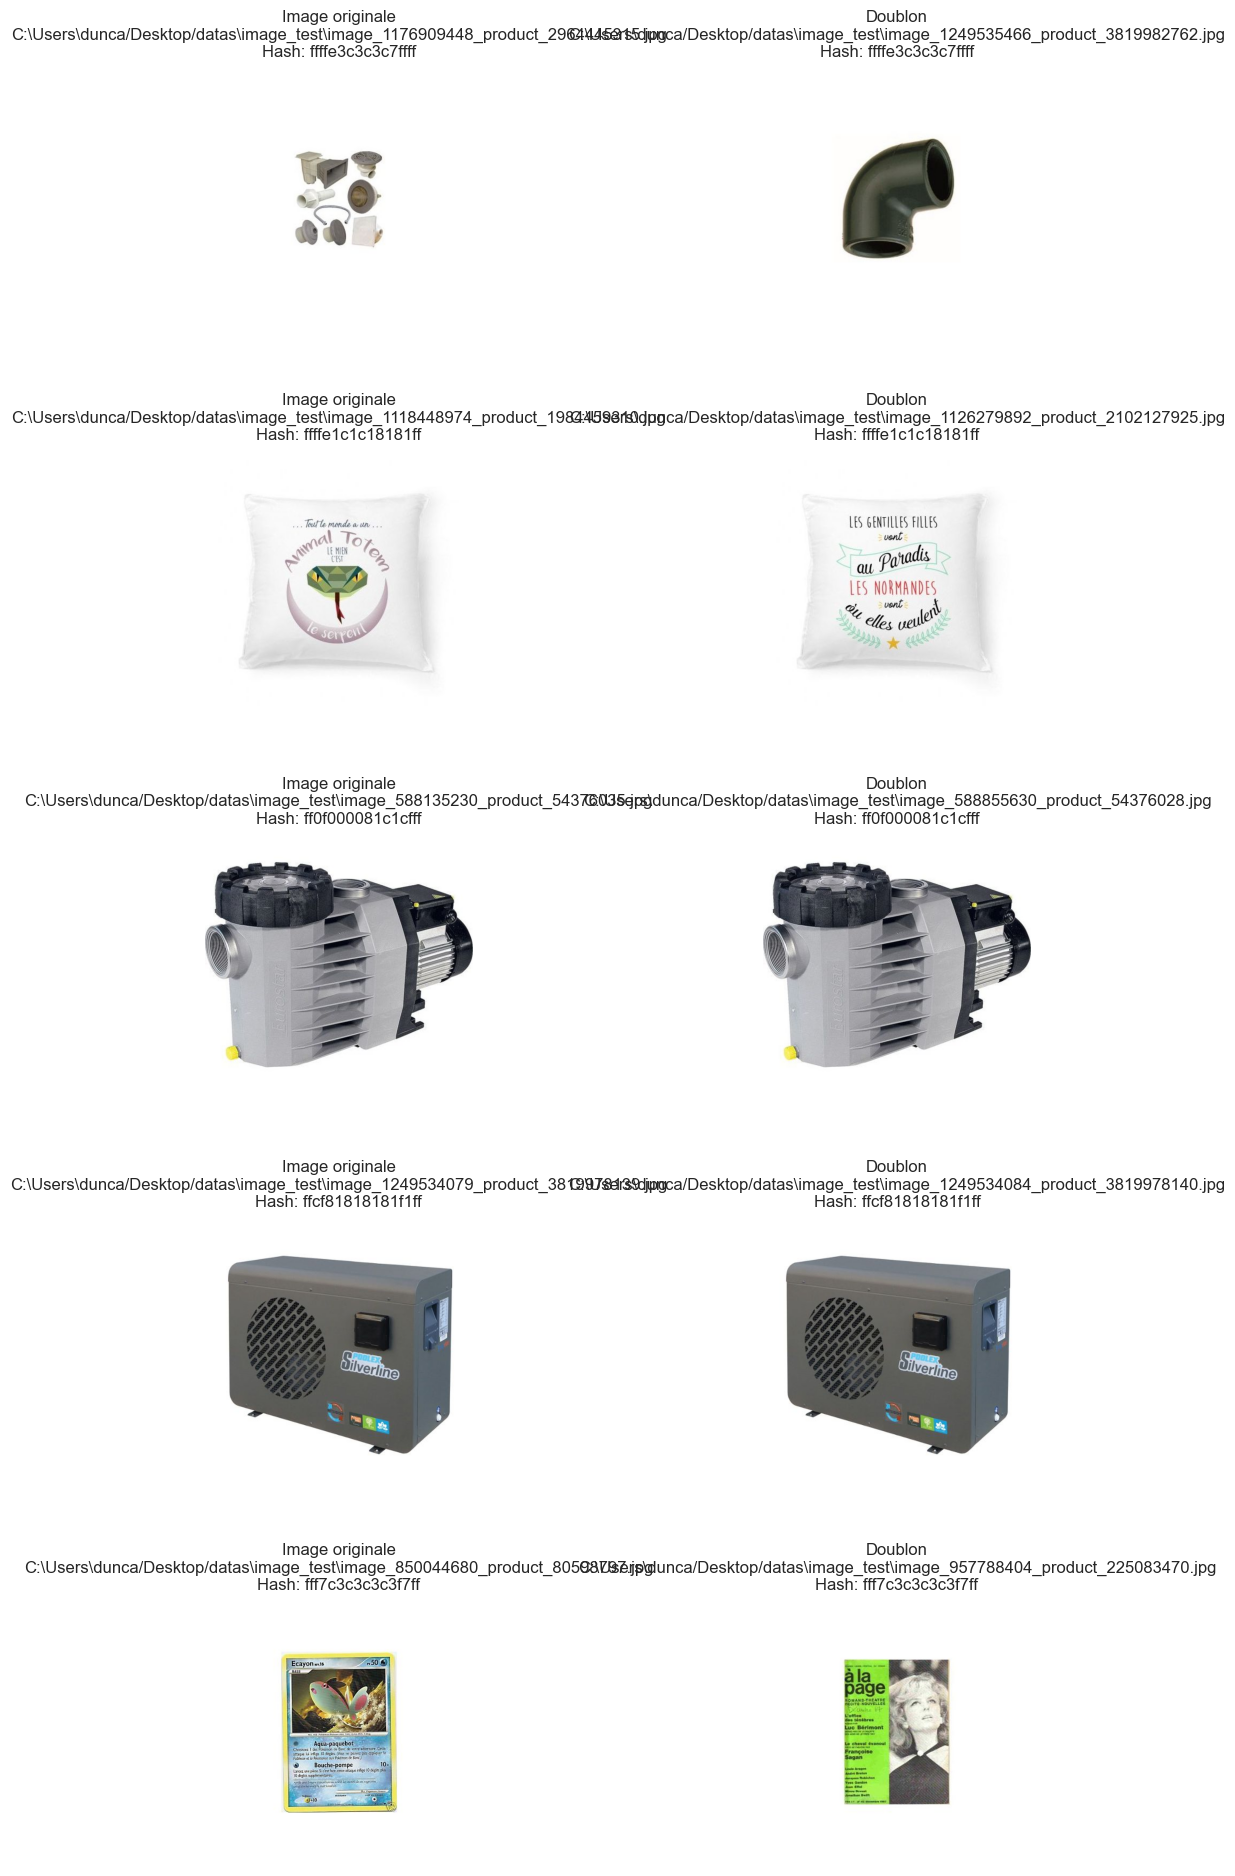

In [71]:
import matplotlib.pyplot as plt
import cv2

def show_random_duplicates(df_images, num_pairs=5):
    """
    Affiche des images doublons côte à côte en vérifiant leur association.
    
    Args:
        df (pd.DataFrame): DataFrame contenant les informations des images.
        num_pairs (int): Nombre de paires de doublons à afficher.
    """
    # Sélectionner les doublons basés sur les hachages
    duplicate_groups = df_images.groupby('hash').filter(lambda x: len(x) > 1)
    if duplicate_groups.empty:
        print("Aucun doublon trouvé dans le DataFrame.")
        return

    # Prendre un échantillon aléatoire de paires de doublons
    duplicate_hashes = duplicate_groups['hash'].unique()
    sampled_hashes = np.random.choice(duplicate_hashes, min(num_pairs, len(duplicate_hashes)), replace=False)
    
    fig, axes = plt.subplots(num_pairs, 2, figsize=(12, num_pairs * 4))
    fig.tight_layout(pad=5.0)
    
    for i, hash_value in enumerate(sampled_hashes):
        # Trouver les chemins des doublons associés à ce hash
        duplicate_paths = duplicate_groups[duplicate_groups['hash'] == hash_value]['path'].tolist()
        if len(duplicate_paths) < 2:
            continue  # Passer si moins de 2 images pour ce hash
        
        img1_path = duplicate_paths[0]
        img2_path = duplicate_paths[1]

        # Charger les images
        img1 = cv2.imread(img1_path)
        img2 = cv2.imread(img2_path)

        if img1 is None or img2 is None:
            print(f"Impossible de charger l'une des images : {img1_path}, {img2_path}")
            continue
        
        # Convertir les images en RGB pour Matplotlib
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

        # Affichage des images
        axes[i, 0].imshow(img1)
        axes[i, 0].set_title(f"Image originale\n{img1_path}\nHash: {hash_value}")
        axes[i, 0].axis('off')

        axes[i, 1].imshow(img2)
        axes[i, 1].set_title(f"Doublon\n{img2_path}\nHash: {hash_value}")
        axes[i, 1].axis('off')
    
    plt.show()

# Appeler la fonction pour afficher 5 paires de doublons
show_random_duplicates(df_images, num_pairs=5)
